In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi
from datetime import datetime
import networkx as nx
import scipy
import itertools

In [92]:
file = r"C:\Users\PcLaptop\Documents\GitHub\Climate-and-conflict\temp-pre-conf-new.csv"
df = pd.read_csv(file)
#drop rows with NaN values
df = df.dropna()

In [93]:
reg=[]
for admin in df['admin1'].unique():
    a = df[df['admin1']==admin].reset_index(drop=True)
    reg.append(a)

In [94]:
avg_t = np.zeros(18)
avg_p = np.zeros(18)
std_t = np.zeros(18)
std_p = np.zeros(18)

for i in range(18):
    
    #reg[i]['time'] = pd.to_datetime(reg[i]['time'])
    #reg[i].set_index('time', inplace=True)

    reg[i]['year'] = reg[i]['time'].str[:4]
    reg[i]['month'] = reg[i]['time'].str[5:7]

    reg[i]['avg_temp'] = np.tile(reg[i].groupby('month')['tmx'].mean(), 24)
    reg[i]['std_temp'] = np.tile(reg[i].groupby('month')['tmx'].std(), 24)
    
    reg[i]['difference']= (reg[i]['tmx']-reg[i]['avg_temp'])/reg[i]['std_temp']
    reg[i]['TA'] = (reg[i]['difference'].shift(2) + reg[i]['difference'].shift(1) + reg[i]['difference'])/3
    
    reg[i]['avg_pre'] = np.tile(reg[i].groupby('month')['pre'].mean(), 24)
    reg[i]['std_pre'] = np.tile(reg[i].groupby('month')['pre'].std(), 24)
    reg[i]['diff_p']= (reg[i]['pre']-reg[i]['avg_pre'])/reg[i]['std_pre']
    reg[i]['PA'] = (reg[i]['diff_p'].shift(2) + reg[i]['diff_p'].shift(1) + reg[i]['diff_p'])/3
    
    #reg[i] = reg[i].reindex(columns=['time','admin1','conflicts','TA','PA'])
    reg[i] = reg[i].reset_index()

In [96]:
#show all rows
pd.set_option('display.max_rows', None)
reg[2]

,index,time,admin1,tmx,pre,conflicts,year,month,avg_temp,std_temp,difference,TA,avg_pre,std_pre,diff_p,PA
0,0,1997-01,Banadir,35.240000,0.000500,0.0,1997,01,35.561250,0.858450,-0.374221,NaN,0.139083,0.271786,-0.509899,NaN
1,1,1997-02,Banadir,36.340501,0.000000,0.0,1997,02,36.585875,0.479264,-0.511982,NaN,0.122854,0.306807,-0.400429,NaN
2,2,1997-03,Banadir,36.483000,1.288500,0.0,1997,03,37.271208,0.476184,-1.655261,-0.847154,0.696292,1.135796,0.521404,-0.129641
3,3,1997-04,Banadir,35.782000,5.754000,1.0,1997,04,36.688834,1.126043,-0.805328,-0.990857,3.842104,2.795627,0.683888,0.268288
4,4,1997-05,Banadir,33.227500,1.875500,0.0,1997,05,34.458125,1.487812,-0.827137,-1.095909,1.936313,1.392560,-0.043670,0.387207
5,5,1997-06,Banadir,32.803498,0.183000,0.0,1997,06,33.138750,0.909168,-0.368746,-0.667070,0.667104,0.744517,-0.650226,-0.003336
6,6,1997-07,Banadir,33.075500,0.045000,0.0,1997,07,32.545229,0.568518,0.932724,-0.087720,0.428438,0.746890,-0.513379,-0.402425
7,7,1997-08,Banadir,33.289000,0.007500,2.0,1997,08,33.119646,0.548156,0.308952,0.290977,0.789812,0.989115,-0.790922,-0.651509
8,8,1997-09,Banadir,34.172001,0.428000,0.0,1997,09,34.397500,0.783473,-0.287820,0.317952,0.724708,1.391243,-0.213268,-0.505856
9,9,1997-10,Banadir,33.569499,15.188000,1.0,1997,10,35.052312,0.698655,-2.122384,-0.700417,3.710917,3.805142,3.016204,0.670671


In [107]:
reg[2]['time']

0      1997-01
1      1997-02
2      1997-03
3      1997-04
4      1997-05
5      1997-06
6      1997-07
7      1997-08
8      1997-09
9      1997-10
10     1997-11
11     1997-12
12     1998-01
13     1998-02
14     1998-03
15     1998-04
16     1998-05
17     1998-06
18     1998-07
19     1998-08
20     1998-09
21     1998-10
22     1998-11
23     1998-12
24     1999-01
25     1999-02
26     1999-03
27     1999-04
28     1999-05
29     1999-06
30     1999-07
31     1999-08
32     1999-09
33     1999-10
34     1999-11
35     1999-12
36     2000-01
37     2000-02
38     2000-03
39     2000-04
40     2000-05
41     2000-06
42     2000-07
43     2000-08
44     2000-09
45     2000-10
46     2000-11
47     2000-12
48     2001-01
49     2001-02
50     2001-03
51     2001-04
52     2001-05
53     2001-06
54     2001-07
55     2001-08
56     2001-09
57     2001-10
58     2001-11
59     2001-12
60     2002-01
61     2002-02
62     2002-03
63     2002-04
64     2002-05
65     2002-06
66     200

ValueError: The number of FixedLocator locations (18), usually from a call to set_ticks, does not match the number of labels (12).

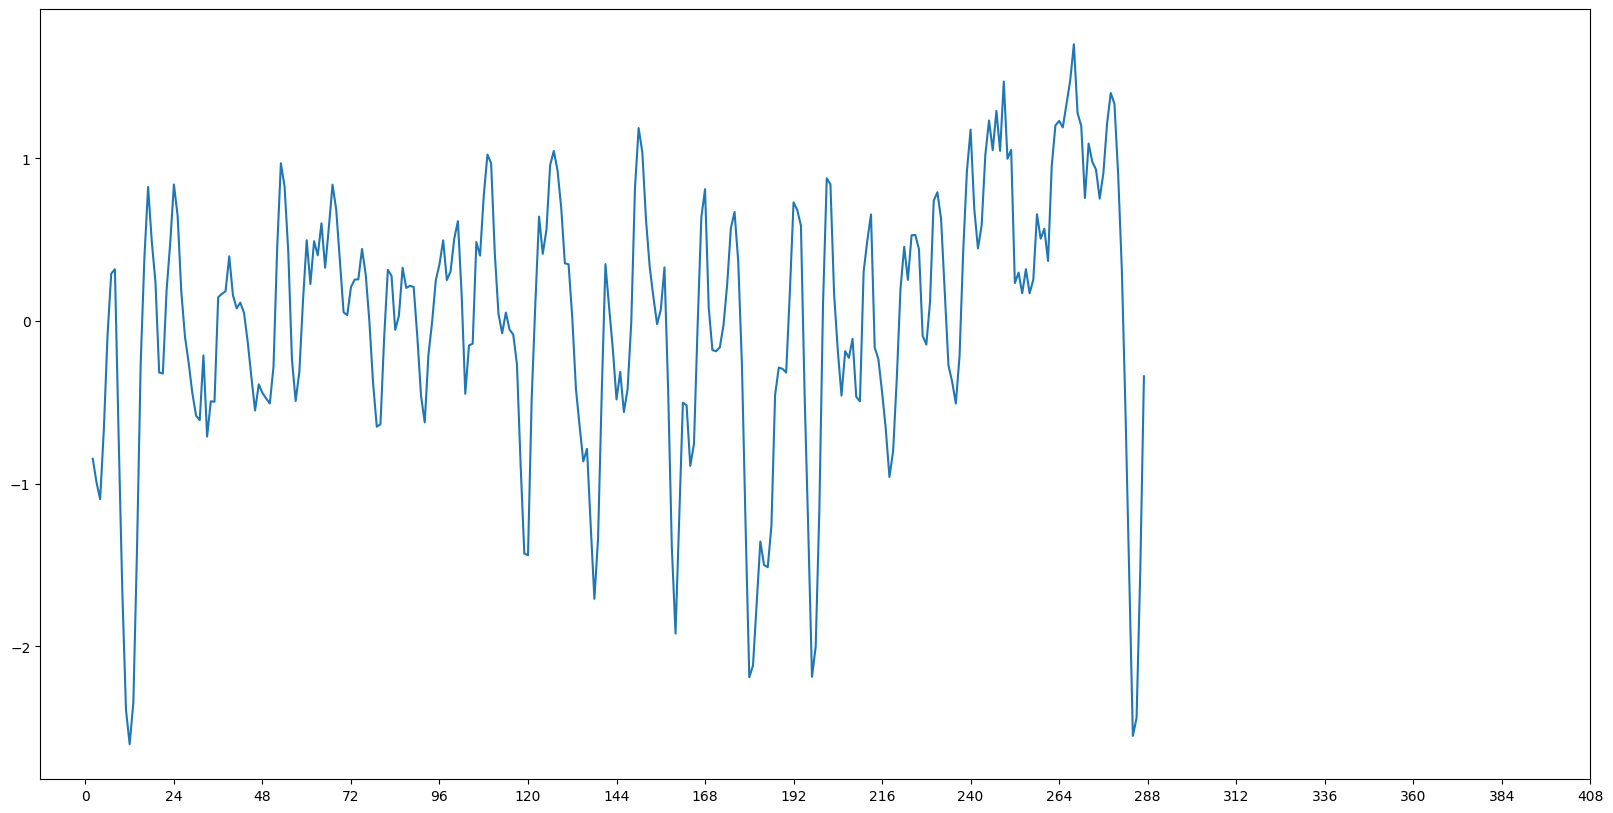

In [109]:
plt.figure(figsize=(20,10))
reg[2]['TA'].plot() 
#put years on x-axis
plt.xticks(np.arange(0, 432, step=24), reg[2]['year'][::24], rotation=45)

In [83]:
reg_TA_PA=pd.concat([reg[i] for i in range(18)], axis=0)

In [87]:
reg_TA_PA['admin1'] = reg_TA_PA['admin1'].str.replace('Lower Shabelle', 'Lower_Shabelle')
reg_TA_PA['admin1'] = reg_TA_PA['admin1'].str.replace('Middle Shabelle', 'Middle_Shabelle')
reg_TA_PA['admin1'] = reg_TA_PA['admin1'].str.replace('Lower Juba', 'Lower_Juba')
reg_TA_PA['admin1'] = reg_TA_PA['admin1'].str.replace('Middle Juba', 'Middle_Juba')
reg_TA_PA['admin1'] = reg_TA_PA['admin1'].str.replace('Woqooyi Galbeed', 'Woqooyi_Galbeed')

In [88]:
reg_TA_PA['DL'] = 0
mask = reg_TA_PA['TA'] > 0
# Create a group identifier for each consecutive group
group_id = (mask != mask.shift()).cumsum()
# Calculate the count within each group
count = reg_TA_PA.groupby(group_id).cumcount() + 1
# Assign the count values to the 'DL' column
reg_TA_PA['DL'] = np.where(mask, count, 0)

In [89]:
#in df remove all rows that contain a NaN
reg_TA_PA = reg_TA_PA.dropna()
reg_TA_PA.reset_index(drop=True, inplace=True)
len(reg_TA_PA)

5148

In [90]:
reg_TA_PA.to_csv("reg_TA_PA_DL_new.csv", index=False)